# Week 12 – LSTM Example Using SECOM Sensor Data
This notebook demonstrates how to use an LSTM (Long Short-Term Memory) model to learn patterns in the SECOM dataset for predicting the next time step in a sequence of sensor readings.

This is an unsupervised learning example, focusing on sequential dependencies in high-dimensional sensor data.

## Step 1: Import Required Libraries


Importing the necessary libraries for data handling, preprocessing, modeling, and visualization.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Step 2: Load and Preprocess the Data

Load the SECOM data, remove columns with too many missing values, fill remaining NaNs with column means, and standardize the features.

In [28]:
# Load SECOM data file
secom_df = pd.read_csv('secom.data', delim_whitespace=True, header=None)

# Drop columns with too many NaNs (over 20%)
nan_ratio = secom_df.isna().mean()
secom_df = secom_df.loc[:, nan_ratio < 0.2]

# Fill remaining NaNs with column means
secom_df = secom_df.fillna(secom_df.mean())

# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(secom_df)

<ipython-input-28-8ca0e994309f>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  secom_df = pd.read_csv('secom.data', delim_whitespace=True, header=None)


## Step 3: Create Sequences
Using previous 10 time steps to predict the next time step.

Transform the continuous data into sequences of 10 timesteps, where each sample is used to predict the next sensor reading.

In [29]:
sequence_length = 10
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Build and Train the LSTM Model
Define a Sequential LSTM model with 64 hidden units and output a dense layer to predict all sensor values at the next timestep.

In [30]:
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), activation='relu'))
model.add(Dense(X.shape[2]))  # Output same number of features as input
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7696 - val_loss: 0.8460
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.8221 - val_loss: 0.8332
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6644 - val_loss: 0.8249
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.7036 - val_loss: 0.8212
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.6820 - val_loss: 0.8265
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.7920 - val_loss: 0.8342
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6432 - val_loss: 0.8546
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6411 - val_loss: 0.8670
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.5952 - val_loss: 0.8823
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5542 - val_loss: 0.8878


## Step 5: Evaluate and Visualize the Predictions
The model is compiled using MSE loss and trained using the training set, while evaluating performance on the validation set.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


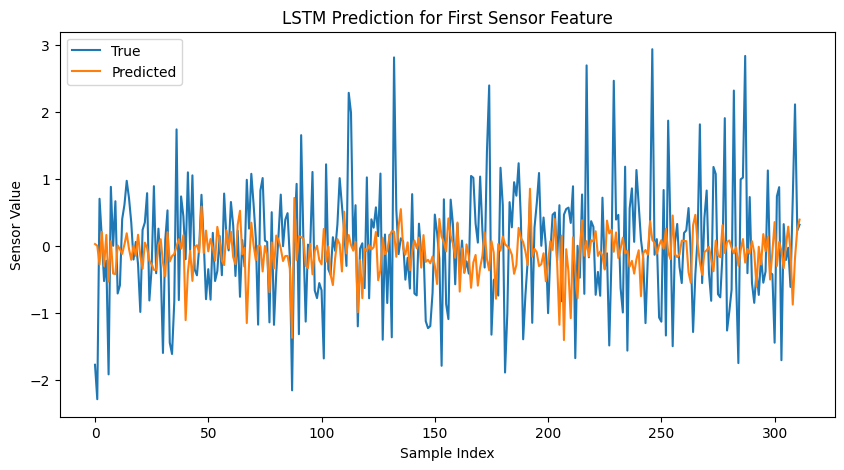

In [31]:
y_pred = model.predict(X_test)

# Plot true vs predicted for one feature (first sensor)
plt.figure(figsize=(10, 5))
plt.plot(y_test[:, 0], label='True')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('LSTM Prediction for First Sensor Feature')
plt.xlabel('Sample Index')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

# Summary
In this notebook, I have explored how to use Long Short-Term Memory (LSTM) networks for modeling sequential sensor data from the SECOM dataset. By treating the sensor readings as a time-series, building sequences of 10 timesteps and trained an LSTM to predict the next sensor reading. This approach, while unsupervised, provides a powerful way to detect patterns and anticipate potential shifts in sensor behavior valuable in quality monitoring or early fault detection.

#Key Points
- Proper data cleaning and normalization are critical when working with high-dimensional sensor data.
- LSTM models excel at capturing temporal dependencies in sequences.
- Predictive modeling can be done even in the absence of labeled output using sequence-to-one or sequence-to-sequence strategies.

This exercise demonstrates the versatility of RNN-based models like LSTM in real-world industrial and healthcare applications where sequential patterns matter.